In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("youtube-comments-sentiment.csv")  

print("✅ Dataset loaded successfully!\n")
print(df.head())

print("\nColumns in dataset:")
print(df.columns.tolist())

print("\nWe will use:")
print(" - CommentText (the actual YouTube comment)")
print(" - Sentiment   (label: Positive / Negative / Neutral)")

texts = df["CommentText"].astype(str)
labels = df["Sentiment"].astype(str)

print("\nClass distribution:")
print(labels.value_counts())


✅ Dataset loaded successfully!

                    CommentID      VideoID  \
0  UgyRjrEdJIPrf68uND14AaABAg  mcY4M9gjtsI   
1  UgxXxEIySAwnMNw8D7N4AaABAg  2vuXcw9SZbA   
2  UgxB0jh2Ur41mcXr5IB4AaABAg  papg2tsoFzg   
3  UgwMOh95MfK0GuXLLrF4AaABAg  31KTdfRH6nY   
4  UgxJuUe5ysG8OSbABAl4AaABAg  -hV6aeyPHPA   

                                          VideoTitle              AuthorName  \
0        They killed my friend.#tales #movie #shorts         @OneWhoWandered   
1  Man Utd conceding first penalty at home in yea...           @chiefvon3068   
2                       Welcome to Javascript Course          @Abdulla-ip8qr   
3  Building web applications in Java with Spring ...        @finnianthehuman   
4  After a new engine her car dies on her way hom...  @ryoutubeplaylistb6137   

            AuthorChannelID  \
0  UC_-UEXaBL1dqqUPGkDll49A   
1  UCZ1LcZESjYqzaQRhjdZJFwg   
2  UCWBK35w5Swy1iF5xIbEyw3A   
3  UCwQ2Z03nOcMxWozBb_Cv66w   
4  UCTTcJ0tsAKQokmHB2qVb1qQ   

                       

In [4]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    texts,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples    : {len(X_test)}")

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1, 2)  
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("\nTF-IDF transformation complete.")
print("Shape of training matrix:", X_train_vec.shape)
print("Shape of testing matrix :", X_test_vec.shape)

# We'll store results in a dictionary to compare at the end
results = {}
reports = {}
conf_mats = {}


Training samples: 825780
Test samples    : 206445

TF-IDF transformation complete.
Shape of training matrix: (825780, 5000)
Shape of testing matrix : (206445, 5000)


In [5]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

nb_preds = nb_model.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_preds)

print(f"\nNaive Bayes Accuracy: {nb_acc * 100:.2f}%")

print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, nb_preds))

cm_nb = confusion_matrix(y_test, nb_preds)
print("Confusion Matrix (Naive Bayes):")
print(cm_nb)


results["Naive Bayes"] = nb_acc
reports["Naive Bayes"] = classification_report(y_test, nb_preds, output_dict=False)
conf_mats["Naive Bayes"] = cm_nb



Naive Bayes Accuracy: 60.15%

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

    Negative       0.54      0.70      0.61     69215
     Neutral       0.57      0.49      0.53     68567
    Positive       0.72      0.62      0.66     68663

    accuracy                           0.60    206445
   macro avg       0.61      0.60      0.60    206445
weighted avg       0.61      0.60      0.60    206445

Confusion Matrix (Naive Bayes):
[[48357 14525  6333]
 [24652 33554 10361]
 [15772 10620 42271]]


In [6]:
lr_model = LogisticRegression(max_iter=200)  
lr_model.fit(X_train_vec, y_train)

lr_preds = lr_model.predict(X_test_vec)
lr_acc = accuracy_score(y_test, lr_preds)

print(f"\nLogistic Regression Accuracy: {lr_acc * 100:.2f}%")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, lr_preds))

cm_lr = confusion_matrix(y_test, lr_preds)
print("Confusion Matrix (Logistic Regression):")
print(cm_lr)


results["Logistic Regression"] = lr_acc
reports["Logistic Regression"] = classification_report(y_test, lr_preds, output_dict=False)
conf_mats["Logistic Regression"] = cm_lr



Logistic Regression Accuracy: 64.63%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    Negative       0.65      0.64      0.64     69215
     Neutral       0.58      0.65      0.61     68567
    Positive       0.73      0.65      0.69     68663

    accuracy                           0.65    206445
   macro avg       0.65      0.65      0.65    206445
weighted avg       0.65      0.65      0.65    206445

Confusion Matrix (Logistic Regression):
[[44264 18084  6867]
 [14634 44396  9537]
 [ 9295 14608 44760]]


In [7]:
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

svm_preds = svm_model.predict(X_test_vec)
svm_acc = accuracy_score(y_test, svm_preds)

print(f"\nSVM Accuracy: {svm_acc * 100:.2f}%")

print("\nClassification Report (SVM):")
print(classification_report(y_test, svm_preds))

cm_svm = confusion_matrix(y_test, svm_preds)
print("Confusion Matrix (SVM):")
print(cm_svm)


results["SVM"] = svm_acc
reports["SVM"] = classification_report(y_test, svm_preds, output_dict=False)
conf_mats["SVM"] = cm_svm



SVM Accuracy: 64.59%

Classification Report (SVM):
              precision    recall  f1-score   support

    Negative       0.65      0.64      0.64     69215
     Neutral       0.57      0.65      0.61     68567
    Positive       0.73      0.65      0.69     68663

    accuracy                           0.65    206445
   macro avg       0.65      0.65      0.65    206445
weighted avg       0.65      0.65      0.65    206445

Confusion Matrix (SVM):
[[44384 18183  6648]
 [14593 44412  9562]
 [ 9443 14678 44542]]


Final Accuracy Scores:

Naive Bayes: 60.15%
Logistic Regression: 64.63%
SVM: 64.59%


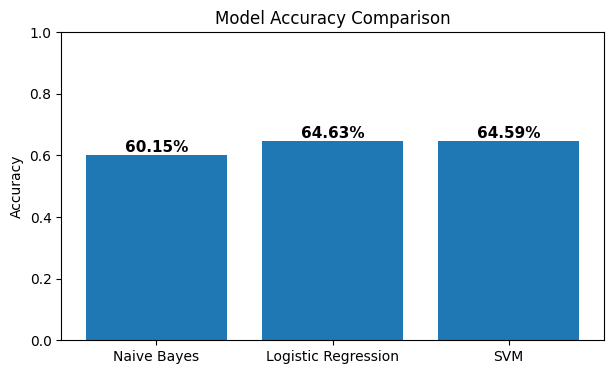


Observation:
- Which model is best?
  -> Logistic Regression performed the best in terms of accuracy.


In [9]:
print("Final Accuracy Scores:\n")
for model_name, acc in results.items():
    print(f"{model_name}: {acc*100:.2f}%")

# Bar plot for report / slides
model_names = list(results.keys())
accuracies = [results[m] for m in model_names]

plt.figure(figsize=(7,4))
bars = plt.bar(model_names, accuracies)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.01,
        f"{yval*100:.2f}%",
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

plt.show()

print("\nObservation:")
print("- Which model is best?")
best_model = max(results, key=results.get)
print(f"  -> {best_model} performed the best in terms of accuracy.")
